In [114]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [60]:
df = pd.read_csv('../../data/processed/dataset.csv')

In [61]:
df.head()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,-0.536707,-0.729352,0.154334,0.585189,1.344378,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.135441,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,-0.531213,-0.325900,-0.139292,0.650385
1,-0.351178,-0.729352,0.154334,-1.708851,-0.762575,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,7.383279,-0.233166,-0.228915,4.223400,-0.495517,-0.383658,1.882486,-0.325900,-0.139292,0.650385
2,-1.127304,-1.779641,0.154334,0.585189,1.193881,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.135441,-0.233166,-0.228915,-0.236776,2.018096,-0.383658,-0.531213,3.068427,7.179138,0.441760
3,0.180669,0.320937,0.154334,0.585189,-0.762575,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.135441,-0.233166,-0.228915,-0.236776,-0.495517,2.606491,-0.531213,3.068427,-0.139292,-1.714033
4,-0.465587,-1.779641,0.154334,0.585189,-1.063568,-0.009265,1.702267,-0.400487,-0.194901,-0.275403,...,-0.135441,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,1.882486,-0.325900,-0.139292,0.163593


In [75]:
df.columns

Index(['movie id', 'rate', 'age', 'gender', 'occupation', 'Other', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [74]:
df = df.rename(columns={'Children\'s': 'Children'})

In [76]:
X = df.drop(columns=['movie id', 'rate'])

In [77]:
X.head(2)

,age,gender,occupation,Other,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,0.154334,0.585189,1.344378,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,1.552503,-0.297659,...,-0.135441,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,-0.531213,-0.3259,-0.139292,0.650385
1,0.154334,-1.708851,-0.762575,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,-0.644121,3.359551,...,7.383279,-0.233166,-0.228915,4.223400,-0.495517,-0.383658,1.882486,-0.3259,-0.139292,0.650385


In [78]:
model_gmm = GaussianMixture(n_components=5, random_state=42)

In [79]:
model_gmm.fit(X)

GaussianMixture(n_components=5, random_state=42)

In [80]:
clusters = model_gmm.predict(X)

In [81]:
cluster_probs = model_gmm.predict_proba(X)

In [82]:
cluster_probs.shape

(93206, 5)

In [83]:
for i in cluster_probs[:5]:
    print(i)

[1.00000000e+00 2.51696665e-13 9.08536733e-25 2.39800271e-23
 0.00000000e+00]
[0. 0. 0. 1. 0.]
[0.00000000e+000 1.00000000e+000 1.65538883e-183 0.00000000e+000
 0.00000000e+000]
[0.00000000e+000 1.00000000e+000 9.88562075e-104 0.00000000e+000
 0.00000000e+000]
[0.00000000e+00 1.00000000e+00 1.92024461e-24 2.68311681e-11
 0.00000000e+00]


In [84]:
from matplotlib import pyplot as plt
import seaborn as sns

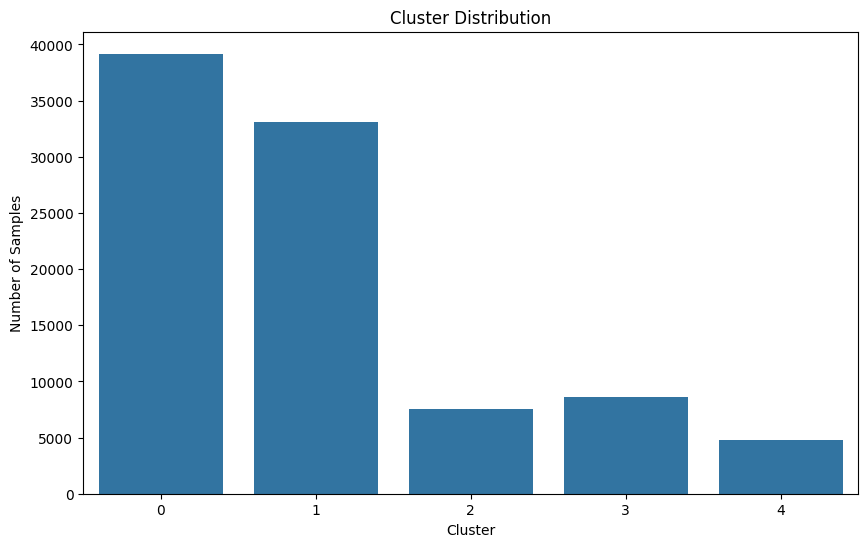

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

In [86]:
# accuracy
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.13728613190198294


In [89]:
df.columns

Index(['movie id', 'rate', 'age', 'gender', 'occupation', 'Other', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [90]:
df.head(1)

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,-0.536707,-0.729352,0.154334,0.585189,1.344378,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.135441,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,-0.531213,-0.3259,-0.139292,0.650385


In [91]:
df2 = df.copy()
df2['cluster'] = clusters

In [92]:
df2.head()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,cluster
0,-0.536707,-0.729352,0.154334,0.585189,1.344378,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,-0.531213,-0.325900,-0.139292,0.650385,0
1,-0.351178,-0.729352,0.154334,-1.708851,-0.762575,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.233166,-0.228915,4.223400,-0.495517,-0.383658,1.882486,-0.325900,-0.139292,0.650385,3
2,-1.127304,-1.779641,0.154334,0.585189,1.193881,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.233166,-0.228915,-0.236776,2.018096,-0.383658,-0.531213,3.068427,7.179138,0.441760,1
3,0.180669,0.320937,0.154334,0.585189,-0.762575,-0.009265,-0.587452,-0.400487,-0.194901,-0.275403,...,-0.233166,-0.228915,-0.236776,-0.495517,2.606491,-0.531213,3.068427,-0.139292,-1.714033,1
4,-0.465587,-1.779641,0.154334,0.585189,-1.063568,-0.009265,1.702267,-0.400487,-0.194901,-0.275403,...,-0.233166,-0.228915,-0.236776,-0.495517,-0.383658,1.882486,-0.325900,-0.139292,0.163593,1


In [93]:
df2.value_counts('cluster')

cluster
0    39172
1    33059
3     8641
2     7528
4     4806
Name: count, dtype: int64

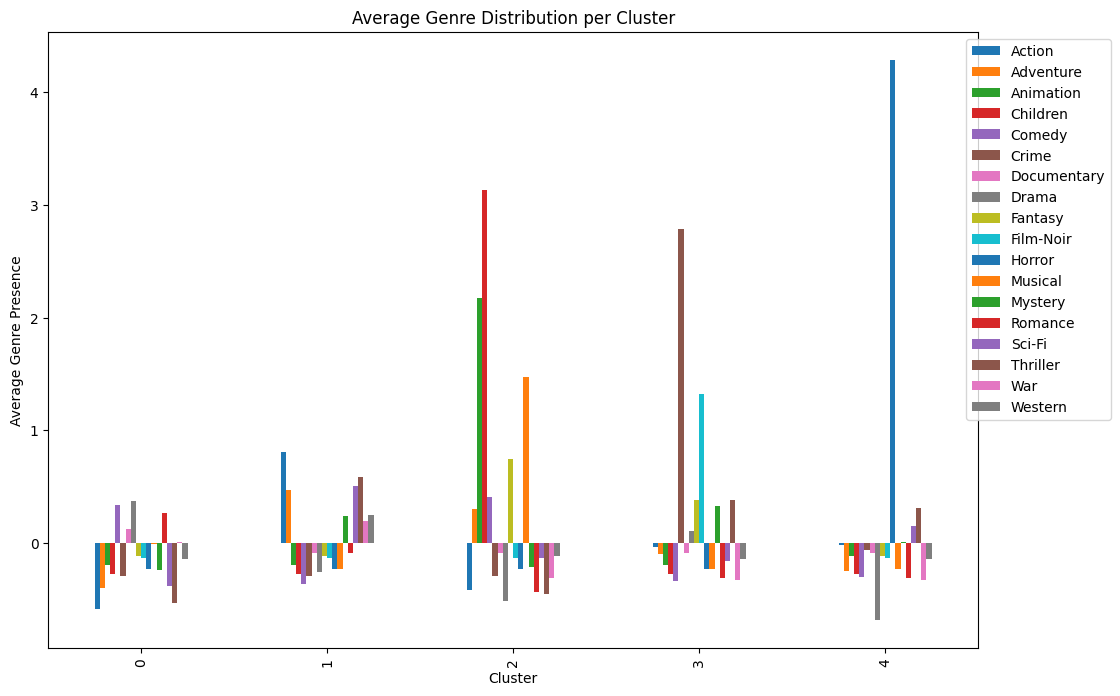

In [94]:
cluster_genre = df2.groupby('cluster')[['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].mean()
cluster_genre.plot(kind='bar', figsize=(12, 8))
plt.title('Average Genre Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Genre Presence')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [104]:
cluster_movies_ratings = df2.groupby(['cluster', 'movie id'])['rate'].mean().reset_index()
cluster_movies_ratings.head()

,cluster,movie id,rate
0,0,-1.266450,0.102127
1,0,-1.257174,0.350946
2,0,-1.254082,0.208406
3,0,-1.244806,-0.143846
4,0,-1.241713,0.393790


In [105]:
cluster_movies_ratings['cluster'].value_counts()

cluster
0    896
1    698
2    144
3    121
4     88
Name: count, dtype: int64

In [111]:
top_movies_per_cluster = {}
movie_count = 5

for cluster in df2['cluster'].unique():
    top_movies = cluster_movies_ratings[cluster_movies_ratings['cluster'] == cluster] \
        .sort_values(by='rate', ascending=False) \
        .head(movie_count)['movie id'].tolist()
    top_movies_per_cluster[cluster] = top_movies

for cluster, movies in top_movies_per_cluster.items():
    print(f'Cluster {cluster}: Top Movies IDs: {movies}')

Cluster 0: Top Movies IDs: [3.8262963738275775, 3.659321068195795, 3.714979503406389, 1.2319948659559905, 3.464516544958715]
Cluster 3: Top Movies IDs: [2.184372535115048, -1.247897636204931, -0.8923020779150234, 2.397729870088992, 0.7465296255080294]
Cluster 1: Top Movies IDs: [-1.105659412888968, 0.69705546087639, -1.1087515481784451, 1.82877697682514, 1.831869112114617]
Cluster 2: Top Movies IDs: [-0.5212458431777284, 2.7131276696156927, -0.7624323957569701, -0.0234120615718576, -0.9324998366782304]
Cluster 4: Top Movies IDs: [1.3525881422456112, 1.355680277535089, -0.7129582311253307, -0.7191425017042857, 1.3092982481929267]


#### Soft Clustering

In [112]:
cluster_movie_matrix = cluster_movies_ratings.pivot(index='movie id', columns='cluster', values='rate').fillna(0)
cluster_movie_matrix.head()

cluster,0,1,2,3,4
movie id,,,,,
-1.281911,0.0,0.000000,0.24507,0.000000,0.0
-1.278819,0.0,-0.362178,0.00000,0.000000,0.0
-1.275727,0.0,-0.396982,0.00000,0.000000,0.0
-1.272635,0.0,-0.064345,0.00000,0.000000,0.0
-1.269543,0.0,0.000000,0.00000,-0.293866,0.0


In [118]:
weighted_ratings = np.dot(cluster_probs, cluster_movie_matrix.T)

In [122]:
user_index = 7
top_movies_indices = np.argsort(weighted_ratings[user_index])[::-1][:10]
recommended_movie_ids = cluster_movie_matrix.index[top_movies_indices].tolist()
print(f'Recommended Movie IDs for User {user_index}: {recommended_movie_ids}')

Recommended Movie IDs for User 7: [3.714979503406389, 1.2319948659559905, 3.659321068195795, 3.3531996745375268, 3.8262963738275775, 3.2511592099847704, 2.7533254283789, 3.464516544958715, 2.4286512229837665, 2.348255705457353]


In [132]:
import joblib

joblib.dump(model_gmm, '../../models/gmm/gmm_model.pkl')
joblib.dump(cluster_movie_matrix, '../../models/gmm/cluster_movie_matrix.pkl')

['../../models/gmm/cluster_movie_matrix.pkl']

#### Predict Movies for a new user

In [130]:
# recommend movies for new user
new_user = pd.DataFrame({
    'age': [25],
    'gender': [1],
    'occupation': [10],
    'Other': [0],
    'Action': [1],
    'Adventure': [0],
    'Animation': [0],
    'Children': [0],
    'Comedy': [1],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Fantasy': [0],
    'Film-Noir': [0],
    'Horror': [0],
    'Musical': [0],
    'Mystery': [0],
    'Romance': [1],
    'Sci-Fi': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
    'release year': [1995],
})
movies_count = 5

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_user_scaled = scaler.fit_transform(new_user)

new_user_probs= model_gmm.predict_proba(new_user_scaled)

top_movies_indices_new_user = np.dot(new_user_probs, cluster_movie_matrix.T)

top_indecies = np.argsort(top_movies_indices_new_user[0])[::-1][:movies_count]
recommended_movie_ids_new_user = cluster_movie_matrix.index[top_indecies].tolist()

print(f'Recommended Movie IDs for New User: {recommended_movie_ids_new_user}')

Recommended Movie IDs for New User: [-0.5212458431777284, 2.7131276696156927, -0.7624323957569701, -0.0234120615718576, -0.9324998366782304]


c:\Users\nad soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [133]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.13728613190198294
Calinski-Harabasz Index: 6483.405278186376
Davies-Bouldin Score: 2.282297755112636


### Hyperparameter Tuning

##### Manual Tuning

In [135]:
# manual hyperparameter tuning
best_silhouette = -1
best_n = None

#### Predict Movies for a new user
for n in range(2, 20):
    _model_gmm = GaussianMixture(n_components=n, random_state=42)
    _model_gmm.fit(X)
    _clusters = _model_gmm.predict(X)
    _silhouette_avg = silhouette_score(X, _clusters)
    print(f'Number of Components: {n}, Silhouette Score: {_silhouette_avg}')
    if _silhouette_avg > best_silhouette:
        best_silhouette = _silhouette_avg
        best_n = n
print(f'Best Number of Components: {best_n}, Best Silhouette Score: {best_silhouette}')

Number of Components: 2, Silhouette Score: 0.3300198821041043


KeyboardInterrupt: 